# install dependencies

In [ ]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [ ]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 8.6687404097851335, performing 49.2 it/sec
Step 100: Loss = 1.5667986403969965, performing 418.8 it/sec
Step 200: Loss = 0.8442927542983609, performing 419.5 it/sec
Step 300: Loss = 0.1317998229668801, performing 376.8 it/sec
Step 400: Loss = 0.0109223611598395, performing 670.7 it/sec
No improvement since Step 354, early stopping.
[Best]  Step 353: Loss = 0.0086822245038464
[Final] Step 403: Loss = 0.0104359417625144

predicted end states
------------------------------------
         5th       Mean      95th
SHDL-1  4.95e+00  4.95e+00  4.95e+00
SHDL-2  1.05e+00  1.05e+00  1.05e+00
SHDL-3  3.25e-09  3.41e-09  3.57e-09


predicted conditional events
----------------------------------
       5th       Mean      95th
SHDL  1.00e+00  1.00e+00  1.00e+00
BPHR  1.75e-01  1.75e-01  1.75e-01
DHRS  3.09e-09  3.25e-09  3.40e-09




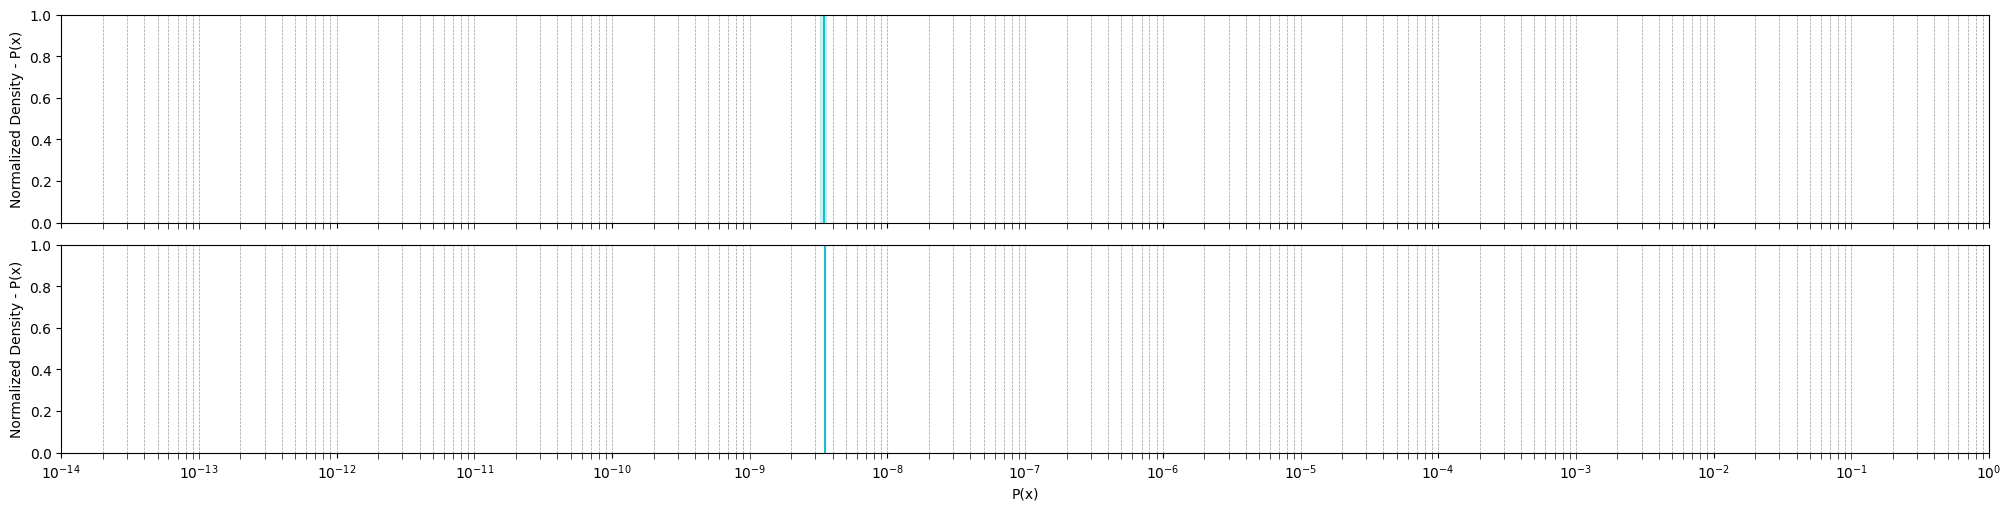

In [ ]:
tunable = {
 'num_samples': 100,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve,
 'initiating_event_frequency': 6.0,
 'freeze_initiating_event': True,
}

conditional_events = {
    'names': ['SHDL', 'BPHR', 'DHRS'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'SHDL-1': {
        'sequence': [1, 0, np.nan],
        'probability': 4.94e0,
    },
    'SHDL-2': {
        'sequence': [1, 1, 0],
        'probability': 1.06e0,
    },
    'SHDL-3': {
        'sequence': [1, 1, 1],
        'probability': 3.5e-9,
      },

}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)